
# Projeto ICMC Júnior
## Objetivo: Prever se um funcionário vai sair da empresa (attrition).

### Etapa 2: Análise exploratória dos dados (EDA)

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configura estilo do seaborn (operação meramente estética)
sns.set_theme(style="whitegrid")

In [2]:
# Leitura do dataset (usamos, agora, a base limpa gerada na etapa 1 do projeto)
df = pd.read_csv('dados_limpos.csv')

#### Relação entre Attrition e Overtime 

Dados que serão plotados (contagem):
Attrition   no  yes
OverTime           
no         955  115
yes        278  122

Proporção dentro de cada categoria de OverTime:
Attrition        no       yes
OverTime                     
no         0.892523  0.107477
yes        0.695000  0.305000


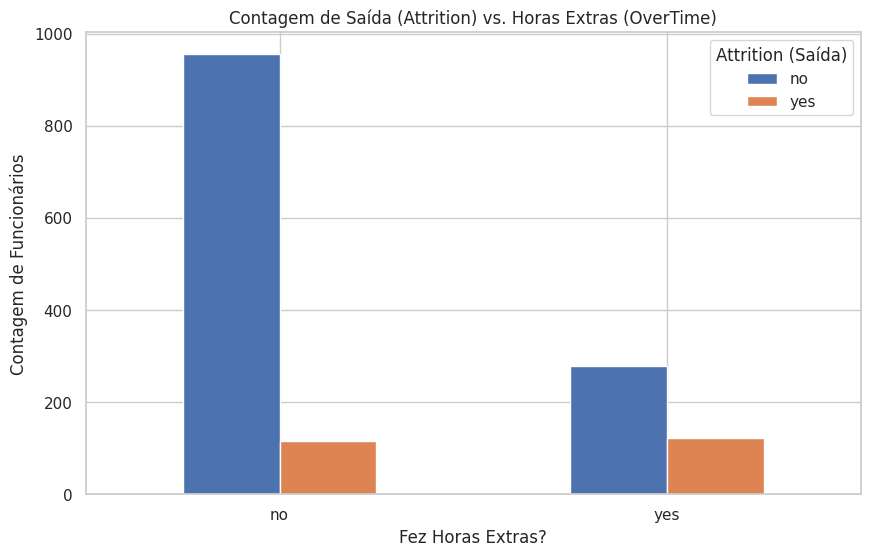

In [3]:
# Nessa análise, buscamos entender se há uma correlação entre trabalhar além do horário e a decisão de deixar a empresa.

# Cria uma tabela cruzada para contar ocorrências de Attrition em relação a OverTime
relacao_overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'])

# Mostra a tabela de dados que será plotada
print("Dados que serão plotados (contagem):")
print(relacao_overtime_attrition)

# Analise da proporcionalidade dentro de cada categoria de OverTime
proporcao_overtime_attrition = relacao_overtime_attrition.div(relacao_overtime_attrition.sum(axis=1), axis=0)
print("\nProporção dentro de cada categoria de OverTime:")
print(proporcao_overtime_attrition)

# Plota o gráfico de barras para a relação entre OverTime e Attrition
plot_overtime_attrition = relacao_overtime_attrition.plot(
    kind='bar',                # Tipo de gráfico: 'bar' (barras)
    figsize=(10, 6),           # Tamanho da figura
    title='Contagem de Saída (Attrition) vs. Horas Extras (OverTime)',
    grid=True                  # Adiciona uma grade de fundo
)

# Configura os rótulos dos eixos e a legenda
plot_overtime_attrition.set_xlabel('Fez Horas Extras?')
plot_overtime_attrition.set_ylabel('Contagem de Funcionários')
plt.legend(title='Attrition (Saída)')

# Garante que os rótulos do eixo X fiquem retos (sem isso, ficam na vertical)
plt.xticks(rotation=0) 

# Mostra o gráfico
plt.show()

Dada a relação mostrada tanto pelo plot quanto pelas estatísticas numéricas, percebe-se que, proporcionalmente, dentre os funcionários que saíram da empresa, a quantidade dos que faziam hora-extra é muito maior do que aqueles que fazem hora-extra e permanecem na empresa: enquanto cerca de 11% dos funcionários que permanecem na empresa fazem hora-extra, 30.5% dos funcionários que saíram da empresa faziam hora-extra. Portanto, conclui-se que um funcionário que faz hora extra tem quase o tripo de probabilidade de deixar a empresa em comparação com quem não faz hora extra.

#### Relação entre Attrition e MonthlyIncome

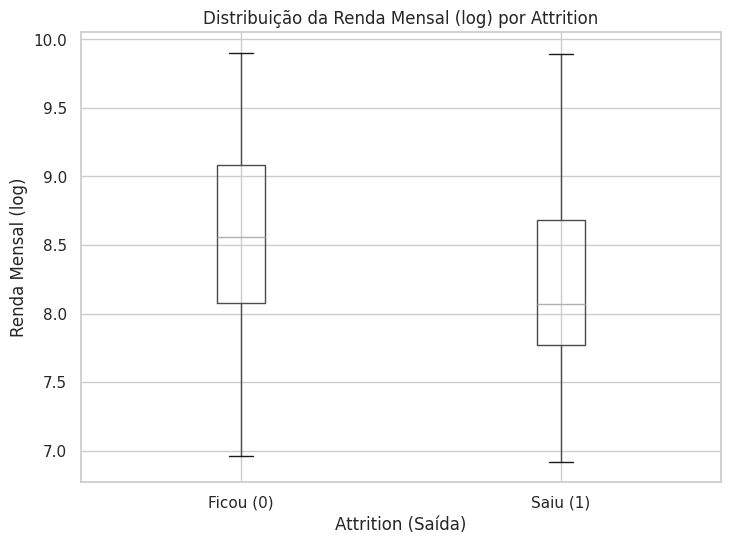

In [4]:
# Nessa análise, buscamos visualizar a distribuição salarial dos funcionários que saíram da empresa em comparação com os que permaneceram.
# Observação: após a limpeza dos dados, 'MonthlyIncome' adota uma escala em log e está nomeada como 'MonthlyIncome_log'.

# Plota o gráfico com boxplot para a relação entre MonthlyIncome_log e Attrition
plot_income_attrition = df.boxplot(
    column='MonthlyIncome_log',  # Coluna de interesse
    by='Attrition',              # Agrupamento por Attrition
    figsize=(8, 6),
    grid=True
)

# Configura os rótulos dos eixos e o título
plot_income_attrition.set_title('Distribuição da Renda Mensal (log) por Attrition')
plot_income_attrition.set_xlabel('Attrition (Saída)')
plot_income_attrition.set_ylabel('Renda Mensal (log)')
plt.suptitle('') # Remove o título automático do pandas
plot_income_attrition.set_xticklabels(['Ficou (0)', 'Saiu (1)'])

plt.show()

Usando o plot gerado, pode-se analisar que funcionários que saíram da empresa (com Attrition=yes) possuem, em geral, uma renda mensal menor do que a daqueles que permaneceram (com Attrition=no). Além disso, é válido ressaltar que o uso de uma escala diferente da convencional (nesse caso, log) não modifica a análise sobre a relação dos dados como um todo.

#### Relação entre Attrition e Department

Tabela de Porcentagens (completa):
Attrition                      no        yes
Department                                  
human resources         80.952381  19.047619
research & development  86.160250  13.839750
sales                   79.372197  20.627803


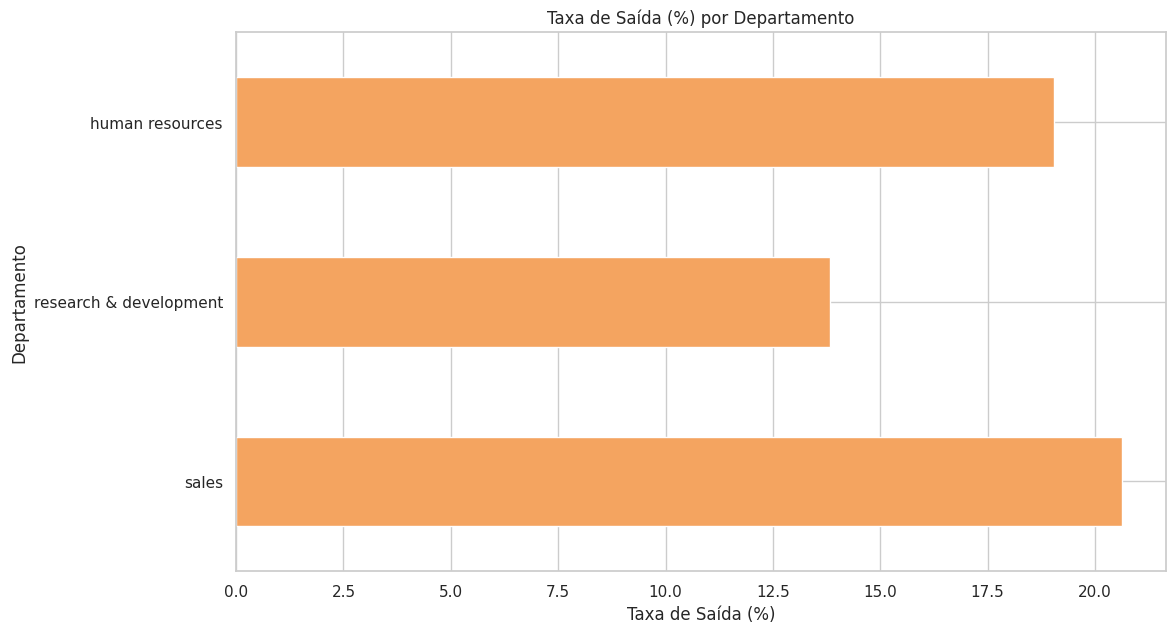

In [ ]:
# Nessa análise, buscamos entender a relação entre o departamento do funcionário e a decisão de deixar a empresa.
# Diferente das últimas análises, que eram sobre relações mais claras com Attrition, variamos a abordagem para analisar uma variável
# talvez menos óbvia, mas que talvez pode ter impacto na decisão de saída.

# Cria uma tabela cruzada para contar ocorrências de Attrition em relação a Department
relacao_department_attrition = pd.crosstab(df['Department'], df['Attrition'])

# Calcula as porcentagens
crosstab_percent = relacao_department_attrition.div(relacao_department_attrition.sum(axis=1), axis=0) * 100

# Mostra a tabela de porcentagens completa. O plot será referente apenas à taxa de saída (Attrition = 'yes')
print("Tabela de Porcentagens (completa):")
print(crosstab_percent)

# Foca apenas na taxa de saída (Attrition = 'yes')
taxa_de_saida_por_depto = crosstab_percent['yes'] 

# Plota o gráfico de barras horizontais para a taxa de saída por departamento
plot_department_attrition = taxa_de_saida_por_depto.plot(
    kind='barh',         # Barras Horizontais (melhor para nomes longos)
    figsize=(12, 7),
    title='Taxa de Saída (%) por Departamento',
    grid=True,           # Grid horizontal ajuda na leitura
    color='sandybrown'
)

plot_department_attrition.set_xlabel('Taxa de Saída (%)')
plot_department_attrition.set_ylabel('Departamento')

# Reverte a ordem do eixo Y para Deptos. Aparecerem em ordem alfabética
plot_department_attrition.invert_yaxis() 

# Remove a legenda, já que só há uma série de dados
if plot_department_attrition.get_legend() is not None:
    plot_department_attrition.get_legend().remove()

# Mostra o gráfico
plt.show()

Como mencionado nos comentários do trecho de código acima, essa análise não esperava encontrar um fator expressivamente determinante sobre a taxa de saída de funcionários, apenas experimentar sobre os fatores "menos óbvios". Com isso, obtemos resultados não claramente determinantes sobre Attrition, mas que podem, de alguma maneira, demonstrar uma certa influência. Podemos apontar que a maior taxa de Attrition pertence ao departamento de vendas, com cerca de 21% de seus funcionários tendo saído da empresa, enquanto a menor pertence ao departamento de pesquisa e desenvolvimento, com 13.8%.

### Etapa 3: Correlações

#### Heatmap de correlações

Matriz de correlação entre todas as variáveis:


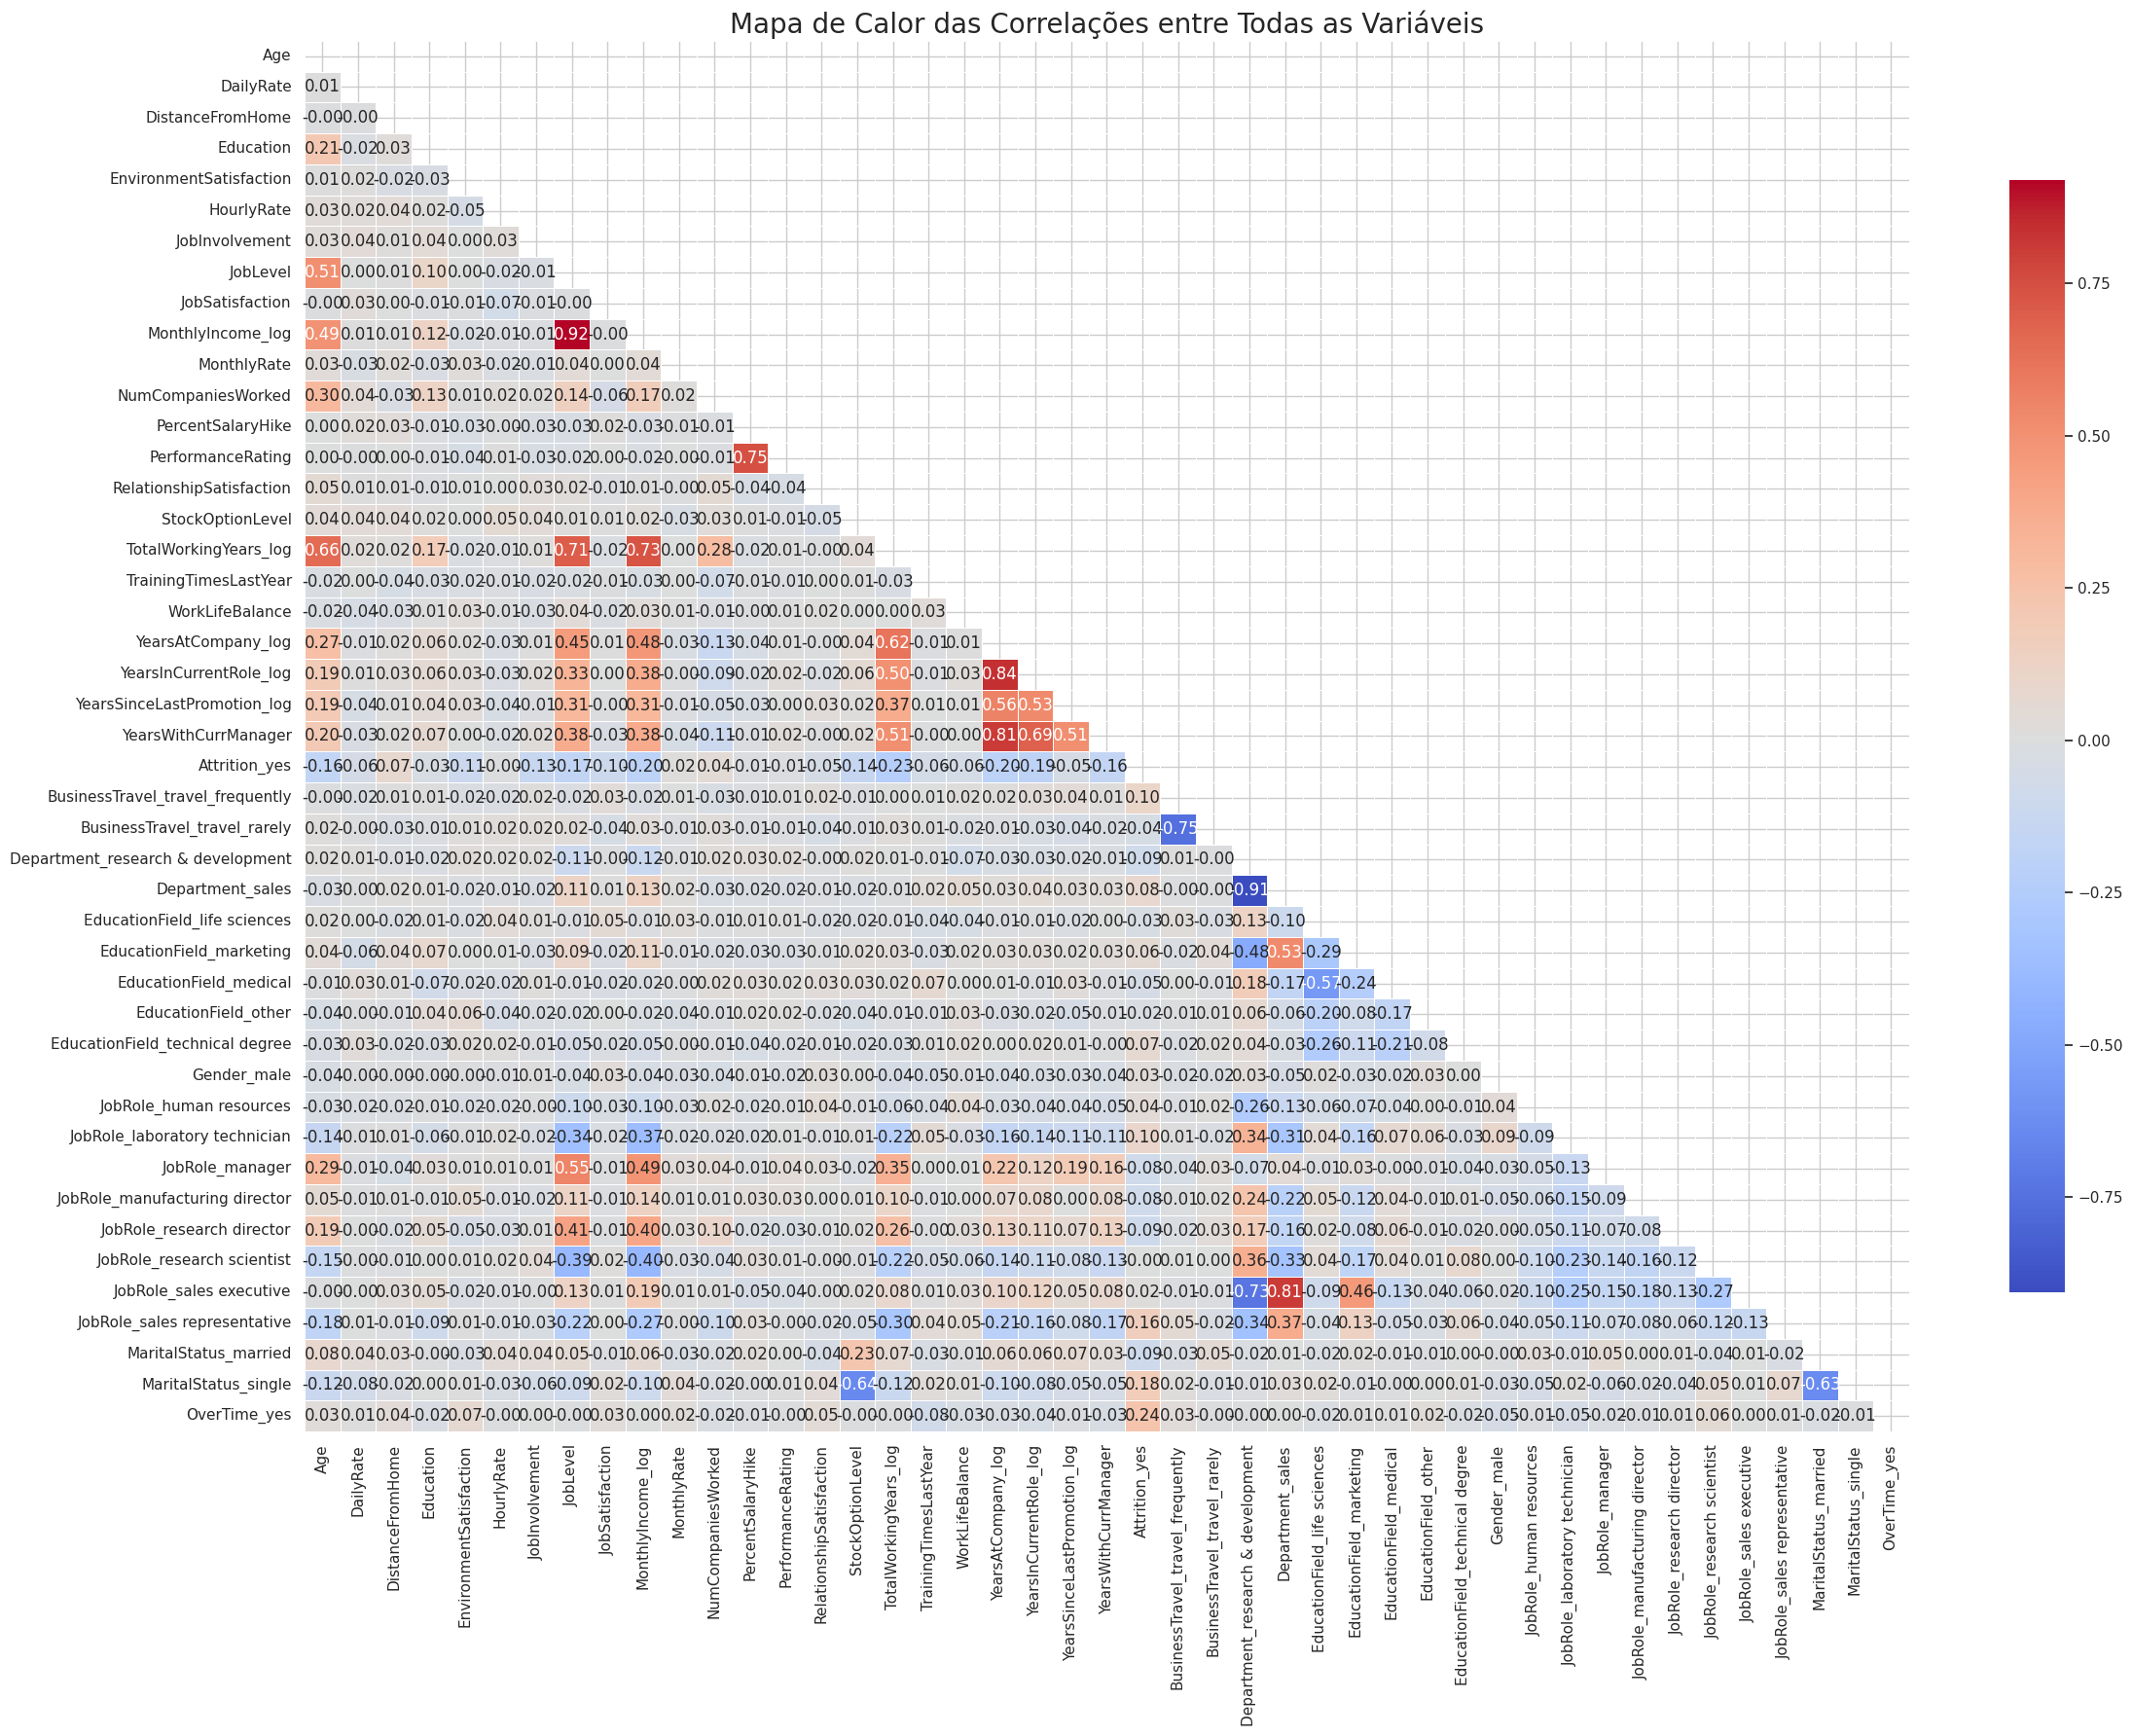


Correlação das variáveis com 'Attrition':


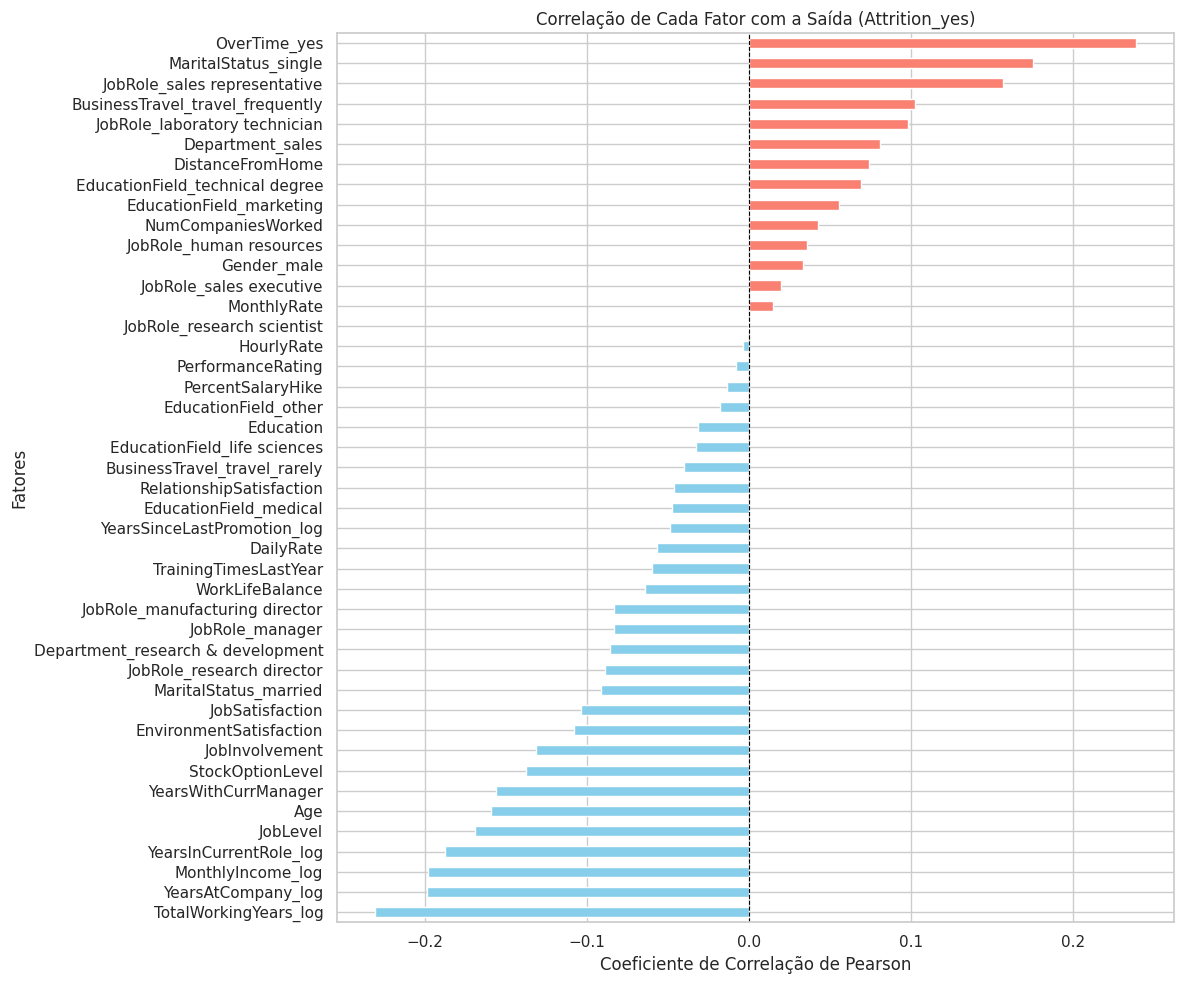

In [ ]:
# Por fim, faremos uma análise geral sobre correlações entre variáveis numéricas do dataset.
# Além disso, ao fim, teremos um plot referente unicamente às correlações com 'Attrition'.

# Prepara o DataFrame para a matriz de correlação, convertendo variáveis categóricas em dummies (one-hot encoding)
# 'drop_first=True' evita variáveis complementares que não adicionam informação nova
df_para_heatmap = pd.get_dummies(df, drop_first=True)

# Calcula a matriz de correlação
matriz_corr = df_para_heatmap.corr()

print("Matriz de correlação entre todas as variáveis:")

# Cria uma figura (grande pois são muitos fatores)
plt.figure(figsize=(24, 18))

# Cria uma "máscara" para cortar a parte simétrica da matriz (evita redundância visual)
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

# Desenha o heatmap
sns.heatmap(
    matriz_corr,
    mask=mask,               # Aplica a máscara
    annot=True,              # Mostra os números (correlação) dentro de cada célula
    fmt='.2f',               # Formata os números para 2 casas decimais
    cmap='coolwarm',         # Mapa de cores (azul = negativo, vermelho = positivo)
    linewidths=.5,           # Linhas finas separando as células
    cbar_kws={"shrink": .8}  # Encolhe um pouco a barra de cor lateral
)

plt.title('Mapa de Calor das Correlações entre Todas as Variáveis', fontsize=20)
plt.tight_layout() # Garante que os rótulos não sejam cortados
plt.show()

print("\nCorrelação das variáveis com 'Attrition':")

corr_com_attrition = matriz_corr['Attrition_yes']

# Retira a correlação da variável consigo mesma
corr_com_attrition = corr_com_attrition.drop('Attrition_yes')

# Ordena os valores para o gráfico ficar mais limpo e fácil de ler
corr_com_attrition_sorted = corr_com_attrition.sort_values(ascending=True)

plt.figure(figsize=(12, 10))

# Define cores para melhor visualização: vermelho para positivo, azul para negativo.
colors = corr_com_attrition_sorted.apply(lambda x: 'salmon' if x > 0 else 'skyblue')

plot_correlacoes_attrition = corr_com_attrition_sorted.plot(
    kind='barh',
    grid=True,
    title='Correlação de Cada Fator com a Saída (Attrition_yes)',
    color=colors  # Aplica as cores condicionais
)

plot_correlacoes_attrition.set_xlabel('Coeficiente de Correlação de Pearson')
plot_correlacoes_attrition.set_ylabel('Fatores')

# Adiciona uma linha vertical no zero para ver claramente o que é positivo/negativo
plot_correlacoes_attrition.axvline(x=0, color='black', linewidth=0.8, linestyle='--')

plt.tight_layout()
plt.show()

Com esses últimos plots, podemos visualizar as correlações entre as variáveis "entre si" (mapa de calor) e as correlações em relação a Attrition (nossa variável alvo). A ferramenta estatística usada para isso é o "Coeficiente de Correlação de Pearson", que mede a força de uma relação linear entre duas variáveis, resultando em um valor entre -1 e +1. Nesses gráficos, os valores significam o seguinte:
- Valores próximos de 0 têm pouca influência linear sobre Attrition.
- Valores próximos de +1 (correlação positiva) significam que, quando o fator aumenta, Attrition também tende a aumentar.
- Valores próximos de -1 (correlação negativa) significam que, quando o fator aumenta, Attrition tende a diminuir.